<a href="https://colab.research.google.com/github/ZahibVentura/M-todos-de-Optimizaci-n-/blob/main/Distribuci%C3%B3n_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
n1,m1 = 8,8
n,m = n1+2,m1+2
matriz = np.zeros((n,m))
Matriz = np.zeros((n1,m1))

In [45]:

N = 10000 #No. iteraciones
lista_prom = []
# Bucle principal
for i in range(1,n-1):
  for j in range(1,m-1):
    suma = 0
    for k in range(N):
      f, l = i,j #Guardar el punto de partida o donde nos encontramos
      while True:
          contador = 0
          # Generar número aleatorio para decidir donde movernos
          n_aleatorio = rd.uniform(0, 1)
          #Movernos de la posicion de donde nos encontramos
          if n_aleatorio <= 0.25 and f > 0:   #avanzar a la izquierda
              f -= 1
          elif 0.25 < n_aleatorio <= 0.5 and l > 0:  #avanzar arriba
              l -= 1
          elif 0.5 < n_aleatorio <= 0.75 and f < m : #avanzar a la derecha
              f += 1
          elif 0.75 < n_aleatorio and l < n: #avanzar abajo
              l += 1

          # Actualizar contador según las condiciones en los bordes
          if l == 0:  # Izquierda
              contador += 100
              break
          elif l == n:  # Derecha
              contador += 60
              break
          elif f == 0:  # Arriba
              contador += 80
              break
          elif f == m :  # Abajo
              contador += 40
              break
      suma = suma + contador
      if i == 1 and j == 8:
        prom = suma/(k+1)
        lista_prom.append(prom)





    # Registrar posición en la matriz
    matriz[i][j] = suma/N


print(matriz)

[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    89.074 84.54  81.77  79.826 78.568 77.344 76.032 74.066  0.   ]
 [ 0.    92.264 86.28  82.278 79.334 77.264 75.018 72.868 70.18   0.   ]
 [ 0.    92.912 87.288 82.184 78.666 75.158 72.562 69.964 67.636  0.   ]
 [ 0.    92.82  86.706 80.63  76.524 72.918 70.382 67.676 65.11   0.   ]
 [ 0.    91.856 84.956 78.842 73.89  70.194 67.29  64.814 62.976  0.   ]
 [ 0.    90.454 81.998 75.352 70.01  66.7   63.5   61.638 60.714  0.   ]
 [ 0.    87.3   76.89  69.822 65.16  61.298 59.468 57.856 57.452  0.   ]
 [ 0.    81.536 69.634 63.034 57.826 55.418 53.782 53.042 53.644  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]]


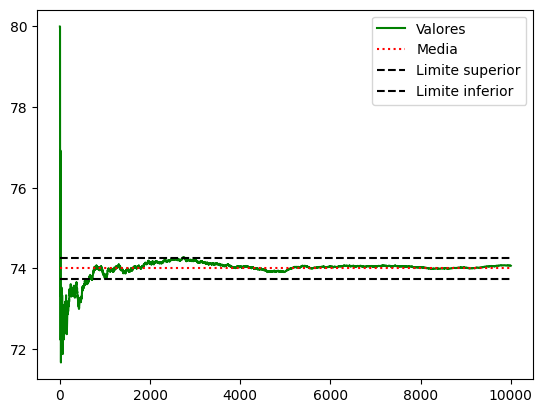

In [46]:
"""media = np.mean(lista_prom)

plt.plot(lista_prom,color = 'green')
plt.hlines(media,color = 'r', linestyles = 'dotted')
plt.show()"""

media = np.mean(lista_prom)
limite = np.std(lista_prom)
#print(media, limite)
# Graficar
plt.plot(lista_prom,color='green', label='Valores')
plt.hlines(media, xmin=0, xmax=len(lista_prom)-1, color='r', linestyle='dotted', label='Media')
plt.hlines(media+limite, xmin=0, xmax=len(lista_prom)-1, color='k', linestyle='dashed', label='Limite superior')
plt.hlines(media-limite, xmin=0, xmax=len(lista_prom)-1, color='k', linestyle='dashed', label='Limite inferior')
plt.legend()  # Agrega una leyenda opcional
plt.show()


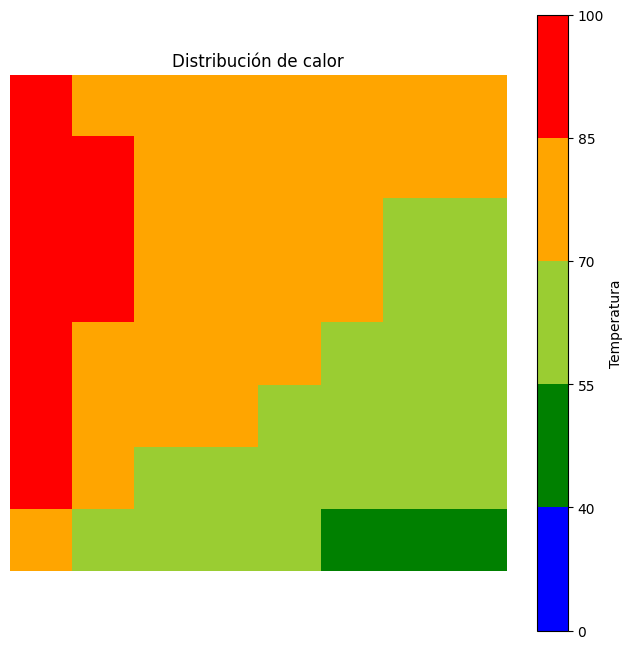

In [47]:


Matriz = matriz[1:-1, 1:-1]

# Configuración del mapa de colores
cmap = mcolors.ListedColormap(['blue','green', 'yellowgreen','orange','red'])
bounds = [0, 40, 55, 70, 85, 100]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Visualización de la matriz con el mapa de calor
plt.figure(figsize=(8, 8))
plt.imshow(Matriz, cmap=cmap, norm=norm)
plt.colorbar(label="Temperatura")
plt.title("Distribución de calor")
plt.axis('off')
plt.show()
